In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([\
                   ['frank', 'M',    np.nan], \
                   ['mary' , np.nan, np.nan], \
                   ['tom'  , 'M',    35], \
                   ['ted'  , 'M',    33], \
                   ['jean' , np.nan, 21], \
                   ['lisa' , 'F',    20]])
df.columns = ['name', 'gender', 'age']
df


,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [3]:
df['gender']

0      M
1    NaN
2      M
3      M
4    NaN
5      F
Name: gender, dtype: object

In [4]:
df.gender

0      M
1    NaN
2      M
3      M
4    NaN
5      F
Name: gender, dtype: object

In [5]:
df['gender'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
Name: gender, dtype: bool

In [6]:
df['gender'].notnull()

0     True
1    False
2     True
3     True
4    False
5     True
Name: gender, dtype: bool

In [7]:
df[df['gender'].notnull()]

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [9]:
df['name'].isnull().values.any()

False

In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

name      0
gender    2
age       2
dtype: int64

In [12]:
df.isnull().sum().sum()

4

In [14]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [13]:
df.dropna()

,name,gender,age
2,tom,M,35.0
3,ted,M,33.0
5,lisa,F,20.0


In [16]:
df['employee'] = np.nan

In [17]:
df

,name,gender,age,employee
0,frank,M,NaN,NaN
1,mary,NaN,NaN,NaN
2,tom,M,35.0,NaN
3,ted,M,33.0,NaN
4,jean,NaN,21.0,NaN
5,lisa,F,20.0,NaN


In [25]:
?df.dropna

In [22]:
df.dropna(how = 'all', axis=1, inplace=True)

In [26]:
df.dropna(thresh = 2)

,name,gender,age
0,frank,M,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [27]:
df

,name,gender,age
0,frank,M,NaN
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [28]:
df.fillna(0)

,name,gender,age
0,frank,M,0.0
1,mary,0,0.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,0,21.0
5,lisa,F,20.0


In [30]:
#df['age'] = df['age'].fillna(0)

In [31]:
df["age"].mean()

27.25

In [35]:
# select gender, avg(age) from df group by gender
df.groupby("gender")["age"].mean()

gender
F    20.0
M    34.0
Name: age, dtype: float64

In [33]:
# select gender, sum(age) from df group by gender
df.groupby("gender")["age"].sum()

gender
F    20.0
M    68.0
Name: age, dtype: float64

In [37]:
df.groupby("gender")["age"].transform("mean")

0    34.0
1     NaN
2    34.0
3    34.0
4     NaN
5    20.0
Name: age, dtype: float64

In [40]:
df['age'] = df['age'].fillna(df.groupby("gender")["age"].transform("mean"))

In [41]:
df

,name,gender,age
0,frank,M,34.0
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [42]:
df.fillna(method = 'pad')

,name,gender,age
0,frank,M,34.0
1,mary,M,34.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,M,21.0
5,lisa,F,20.0


In [43]:
df.fillna(method = 'bfill')

,name,gender,age
0,frank,M,34.0
1,mary,M,35.0
2,tom,M,35.0
3,ted,M,33.0
4,jean,F,21.0
5,lisa,F,20.0


In [44]:
df2 = pd.DataFrame([[1, 870],\
                    [2, 900],\
                    [np.nan, np.nan],\
                    [4, 950],\
                    [5,1080],\
                    [6,1200]])
df2.columns = ['time', 'val']


In [45]:
df2

,time,val
0,1.0,870.0
1,2.0,900.0
2,NaN,NaN
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


In [46]:
df2.interpolate()

,time,val
0,1.0,870.0
1,2.0,900.0
2,3.0,925.0
3,4.0,950.0
4,5.0,1080.0
5,6.0,1200.0


In [47]:
df

,name,gender,age
0,frank,M,34.0
1,mary,NaN,NaN
2,tom,M,35.0
3,ted,M,33.0
4,jean,NaN,21.0
5,lisa,F,20.0


In [48]:
df3 = pd.DataFrame([[1, 870],\
                    [2, 900],\
                    [4, 950],\
                    [5,9999],\
                    [6,1200]])
df3.columns = ['time', 'val']


In [54]:
df3.loc[df3['val'] > 5000,  'val' ] = np.nan

In [55]:
df3

,time,val
0,1,870.0
1,2,900.0
2,4,950.0
3,5,NaN
4,6,1200.0


In [71]:
import random
temp = [random.randint(5,35) for i in range(100)]

In [72]:
np_temp = np.array(temp)

In [73]:
np_temp.mean()

20.18

In [74]:
temp.extend([999,999,999])
np_temp2 = np.array(temp)

In [77]:
#np_temp2

In [76]:
np_temp2.mean()

48.689320388349515

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


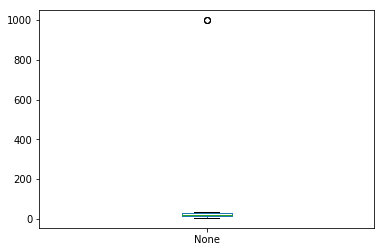

In [81]:
%pylab inline
pd.Series(np_temp2).plot(kind = 'box')

Populating the interactive namespace from numpy and matplotlib


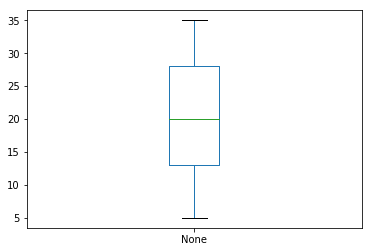

In [82]:
%pylab inline
pd.Series(np_temp2[np_temp2 < 100]).plot(kind = 'box')

## 數據轉換

In [85]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/rent_591_sample2.csv', index_col = 0)

In [86]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


In [89]:
#df['building_area'] / 0.3025

In [92]:
#np.sqrt(df['building_area'])

In [95]:
#df['address'] + df['price']

In [98]:
df['square_feet'] = df['building_area'] / 0.3025

In [99]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,square_feet
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810,19.834711
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868,33.057851
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,26.446281
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032,26.446281
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518,23.140496


In [105]:
ele = '4,500元/月'
int(ele.replace('元/月', '').replace(',', ''))

def normalizePrice(ele):
    return int(ele.replace('元/月', '').replace(',', ''))

#df['price']

In [106]:
normalizePrice('4,500元/月')

4500

In [109]:
df['price'].map(normalizePrice).head()

0     4500
1     7500
2    11000
3     5000
4     5000
Name: price, dtype: int64

In [111]:
df['price'] = df['price'].map(lambda ele: int(ele.replace('元/月', '').replace(',', '')) ).head()

In [114]:
df['price'].describe()

count        5.000000
mean      6600.000000
std       2724.885319
min       4500.000000
25%       5000.000000
50%       5000.000000
75%       7500.000000
max      11000.000000
Name: price, dtype: float64

In [116]:
df2 = pd.DataFrame(\
[\
   [60,70,50],\
   [80,79,68],\
   [63,66,82]], \
  columns = ['First', 'Second', 'Third'])
df2

,First,Second,Third
0,60,70,50
1,80,79,68
2,63,66,82


In [118]:
df2.apply(lambda e: e.max() - e.min(), axis=1)


0    20
1    12
2    19
dtype: int64

In [119]:
df2.apply(lambda e: e.max() - e.min(), axis=0)


First     20
Second    13
Third     32
dtype: int64

In [120]:
df3 = pd.DataFrame(\
[\
   [60,70,50],\
   [80,np.nan,68],\
   [63,66,np.nan]], \
  columns = ['First', 'Second', 'Third'])
df3

,First,Second,Third
0,60,70.0,50.0
1,80,NaN,68.0
2,63,66.0,NaN


In [122]:
df3.applymap(lambda e: '-' if pd.isnull(e) else e)

,First,Second,Third
0,60,70,50
1,80,-,68
2,63,66,-


In [177]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/rent_591_sample2.csv', index_col = 0)

In [178]:
df['price'] = df['price'].map(lambda e: int(e.replace('元/月', '').replace(',', '')))

In [179]:
df['building_area']  = df['building_area'] / 0.3025  

In [180]:
del df['detail_url']

In [181]:
df['floor_info'] = df['floor_info'].fillna('/')
df['floor'] = df['floor_info'].map(lambda e : e.split('/')[0].strip('F'))

In [182]:
df['total_floor'] = df['floor_info'].map(lambda e : e.split('/')[1].strip('F'))

In [183]:
#df['floor_info'].str.extract('(\d)F/(\d)F')

## 處理時間格式資料
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [184]:
from datetime import datetime 
current_time = datetime.now()

In [185]:
# convert time to string
current_time.strftime('%Y%m%d')

'20180806'

In [186]:
current_time.strftime('%Y-%m-%d')

'2018-08-06'

In [187]:
current_time.strftime('%Y/%m/%d')

'2018/08/06'

In [188]:
dt = datetime.strptime('2017-05-20', '%Y-%m-%d')

In [189]:
current_time - dt

datetime.timedelta(443, 40887, 386771)

In [190]:
from datetime import timedelta
current_time - timedelta(days = 1)

datetime.datetime(2018, 8, 5, 11, 21, 27, 386771)

In [191]:
for i in range(1,10):
    print((current_time - timedelta(days = i)).strftime('%Y-%m-%d'))

2018-08-05
2018-08-04
2018-08-03
2018-08-02
2018-08-01
2018-07-31
2018-07-30
2018-07-29
2018-07-28


In [192]:
from time import mktime
mktime(current_time.timetuple())


1533525687.0

In [193]:
datetime.fromtimestamp(1492859823)


datetime.datetime(2017, 4, 22, 19, 17, 3)

In [194]:
df['search_date'] = pd.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [195]:
df[df['search_date'] >= '2017-05-14'].head(3)

,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,floor,total_floor
0,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,19.834711,透天厝/獨立套房,22.878436,120.250810,3,3
1,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,33.057851,透天厝/獨立套房,25.081558,121.461868,4,5
6,2017-05-14,近明新、台元/全新完工/飯店式電梯套房,新竹縣新豐鄉康樂路一段,3F/5F,6500,NaN,23.140496,電梯大樓/雅房,24.871279,120.986334,3,5


In [196]:
a = df['search_date'].dt
?a

In [197]:
pd.get_dummies(df['building_use']).head()

,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df = pd.concat([df, pd.get_dummies(df['building_use'])], axis=1)


In [199]:
#df

In [200]:
df.drop('building_use', axis=1)

,search_date,title,address,floor_info,price,layout,building_area,latitude,longitude,floor,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
0,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,19.834711,22.878436,120.250810,3,...,0,0,0,0,0,0,0,0,0,0
1,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,33.057851,25.081558,121.461868,4,...,0,0,0,0,0,0,0,0,0,0
2,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,26.446281,25.010293,121.511328,8,...,0,0,0,0,1,0,0,0,0,0
3,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,5000,NaN,26.446281,22.551346,120.538032,3,...,0,0,0,0,0,0,0,0,0,0
4,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,5000,NaN,23.140496,25.043652,121.141518,4,...,0,0,0,0,0,0,0,0,0,0
5,2017-05-12,近捷運，採光佳，有景觀，全新家電裝潢,新北市淡水區民族路,9F/11F,22000,2房1廳1衛1陽臺,79.338843,25.136948,121.462779,9,...,0,0,0,0,0,0,1,0,0,0
6,2017-05-14,近明新、台元/全新完工/飯店式電梯套房,新竹縣新豐鄉康樂路一段,3F/5F,6500,NaN,23.140496,24.871279,120.986334,3,...,0,0,0,0,0,0,0,0,0,1
7,2017-05-14,附網路電視包水費!離逢甲商圈近,台中市西屯區西屯路二段,3F/5F,3000,NaN,13.223140,24.173195,120.645027,3,...,0,1,0,0,0,0,0,0,0,0
8,2017-05-13,逢甲大學-有陽台的套房(獨立水電錶),台中市西屯區至善路,10F/14F,6800,NaN,29.752066,24.178854,120.644530,10,...,0,0,0,0,0,0,0,1,0,0
9,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,17000,2房1廳2衛2陽臺,105.785124,25.130052,121.720788,14,...,0,0,0,0,0,0,1,0,0,0


In [202]:
df.head(3)

,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
0,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,19.834711,透天厝/獨立套房,22.878436,120.250810,...,0,0,0,0,0,0,0,0,0,0
1,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,33.057851,透天厝/獨立套房,25.081558,121.461868,...,0,0,0,0,0,0,0,0,0,0
2,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,26.446281,電梯大樓/分租套房,25.010293,121.511328,...,0,0,0,0,1,0,0,0,0,0


In [203]:
df2 = df.pivot_table(index='search_date', columns='building_use', values='price', aggfunc=sum)
df2.head()


building_use,倉庫/其他,公寓/住辦,公寓/其他,公寓/分租套房,公寓/店面,公寓/整層住家,公寓/獨立套房,公寓/辦公,公寓/雅房,其他/其他,...,透天厝/辦公,透天厝/雅房,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房
search_date,,,,,,,,,,,,,,,,,,,,,
2017-05-08,72325.0,371500.0,58500.0,1224399.0,4490600.0,4241986.0,2321837.0,1173780.0,401067.0,6000.0,...,121000.0,203499.0,1110800.0,177814.0,453899.0,10574484.0,31536697.0,5276459.0,21835522.0,105900.0
2017-05-09,236744.0,159000.0,42999.0,1579138.0,3362400.0,4206235.0,3048561.0,855900.0,366199.0,NaN,...,392000.0,178000.0,968399.0,579000.0,408299.0,6219799.0,30583975.0,6233755.0,28541573.0,129700.0
2017-05-10,63748.0,494800.0,NaN,2035480.0,7132600.0,5572385.0,5193507.0,1165900.0,493833.0,NaN,...,646800.0,236900.0,1840888.0,825934.0,748549.0,31005928.0,53833067.0,9925236.0,60122996.0,227300.0
2017-05-11,108200.0,242600.0,11000.0,1643348.0,4824099.0,5068078.0,3147599.0,464000.0,583450.0,3500.0,...,314700.0,405470.0,1219550.0,3648149.0,800399.0,12785298.0,46318253.0,7419697.0,29084108.0,229480.0
2017-05-12,60800.0,1096300.0,75000.0,4318694.0,10924080.0,7866946.0,9554327.0,2882900.0,1069600.0,NaN,...,795300.0,608850.0,4139359.0,734820.0,1517399.0,30397667.0,45193426.0,15130740.0,88289435.0,464600.0


In [204]:
df3 = df.pivot_table(index='building_use', columns='search_date', values='price', aggfunc=sum)
df3.head()

search_date,2017-05-08 00:00:00,2017-05-09 00:00:00,2017-05-10 00:00:00,2017-05-11 00:00:00,2017-05-12 00:00:00,2017-05-13 00:00:00,2017-05-14 00:00:00,2017-05-15 00:00:00
building_use,,,,,,,,
倉庫/其他,72325.0,236744.0,63748.0,108200.0,60800.0,231348.0,590250.0,NaN
公寓/住辦,371500.0,159000.0,494800.0,242600.0,1096300.0,1600499.0,1487800.0,421500.0
公寓/其他,58500.0,42999.0,NaN,11000.0,75000.0,234300.0,143000.0,NaN
公寓/分租套房,1224399.0,1579138.0,2035480.0,1643348.0,4318694.0,6571657.0,5744947.0,14800.0
公寓/店面,4490600.0,3362400.0,7132600.0,4824099.0,10924080.0,24972598.0,20999686.0,4686200.0


In [205]:
df['btype'] = df['building_use'].map(lambda e: str(e).split('/')[0])
df['buse']  = df['building_use'].map(lambda e: str(e).split('/')[1] if len(str(e).split('/'))> 1 else None)


In [206]:
df.head()

,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,...,電梯大樓/住辦,電梯大樓/其他,電梯大樓/分租套房,電梯大樓/店面,電梯大樓/整層住家,電梯大樓/獨立套房,電梯大樓/辦公,電梯大樓/雅房,btype,buse
0,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,19.834711,透天厝/獨立套房,22.878436,120.250810,...,0,0,0,0,0,0,0,0,透天厝,獨立套房
1,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,33.057851,透天厝/獨立套房,25.081558,121.461868,...,0,0,0,0,0,0,0,0,透天厝,獨立套房
2,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,26.446281,電梯大樓/分租套房,25.010293,121.511328,...,0,0,1,0,0,0,0,0,電梯大樓,分租套房
3,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,5000,NaN,26.446281,透天厝/獨立套房,22.551346,120.538032,...,0,0,0,0,0,0,0,0,透天厝,獨立套房
4,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,5000,NaN,23.140496,透天厝/分租套房,25.043652,121.141518,...,0,0,0,0,0,0,0,0,透天厝,分租套房


In [215]:
df_multi_idx = df.pivot_table(index=['btype', 'buse'], columns='search_date', values='price', aggfunc=sum) 
df_multi_idx.shape
df_multi_idx.head()

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0

In [216]:
df_wide = df_multi_idx.unstack()
df_wide.shape

(8, 64)

In [210]:
df_long = df_wide.stack()
df_long.head()

search_date  2017-05-08  2017-05-09  2017-05-10  2017-05-11  2017-05-12  \
btype buse                                                                
倉庫    其他        72325.0    236744.0     63748.0    108200.0     60800.0   
公寓    住辦       371500.0    159000.0    494800.0    242600.0   1096300.0   
      其他        58500.0     42999.0         NaN     11000.0     75000.0   
      分租套房    1224399.0   1579138.0   2035480.0   1643348.0   4318694.0   
      店面      4490600.0   3362400.0   7132600.0   4824099.0  10924080.0   

search_date  2017-05-13  2017-05-14  2017-05-15  
btype buse                                       
倉庫    其他       231348.0    590250.0         NaN  
公寓    住辦      1600499.0   1487800.0    421500.0  
      其他       234300.0    143000.0         NaN  
      分租套房    6571657.0   5744947.0     14800.0  
      店面     24972598.0  20999686.0   4686200.0

## 正規表達法

In [217]:
a = '0912345678'
a == '0912345678'

True

In [220]:
import re
m = re.match('09[0-9]{8}', '0923555666')
m.group(0)

'0923555666'

In [221]:
import re
m = re.match('09\d{2}-?\d{3}-?\d{3}', '0923-555-666')
m.group(0)

'0923-555-666'

In [222]:
import re
m = re.match('09\d{2}-?\d{3}-?\d{3}', '0923555666')
m.group(0)

'0923555666'

In [226]:
#df['address'].str.extract('(.*[市|縣])(.*[區|鄉|鎮|市])(.*[路|街])(.*)')

## Pandas IO

In [227]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/rent_591_sample2.csv', index_col = 0)

In [229]:
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/customer_data.tsv', sep = '\t', index_col= 0)

In [231]:
df = pd.read_excel('data/eps.xlsx')

In [233]:
df = pd.read_clipboard()

In [235]:
df.to_csv('1.csv')

In [237]:
df.to_excel('/Users/davidchiu/Desktop/1.xlsx')

## Pandas Aggregation

In [239]:
df = pd.read_excel('data/eps.xlsx')

In [241]:
df.head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,Year,Season
0,1102,亞洲水泥股份有限公司,水泥工業,0.40,新台幣 10.0000元,13931550,339801,1250044,1371559,102,1
1,1101,台灣水泥股份有限公司,水泥工業,0.38,新台幣 10.0000元,24114047,2026729,314060,1999624,102,1
2,1104,環球水泥股份有限公司,水泥工業,0.30,新台幣 10.0000元,1248072,30247,156012,183441,102,1


In [244]:
df.loc[df['產業別'] == '水泥工業', '營業收入'].mean()

17470910.35714286

In [245]:
# select 產業別, mean(營業收入) from df group by 產業別
df.groupby(['產業別'])['營業收入']

In [246]:
df.groupby(['產業別'])['營業收入'].mean()

產業別
光電業         1.471000e+07
其他          1.049513e+07
其他電子業       7.563766e+07
化學工業        7.241900e+06
半導體業        1.811892e+07
塑膠工業        3.315953e+07
建材營造        4.033990e+06
橡膠工業        1.468315e+07
水泥工業        1.747091e+07
汽車工業        3.775573e+07
油電燃氣業       7.017010e+07
玻璃陶瓷        7.086158e+06
生技醫療業       1.928018e+06
紡織纖維        7.190241e+06
航運業         2.255961e+07
觀光事業        3.327861e+06
貿易百貨        2.011477e+07
資訊服務業       2.466679e+06
通信網路業       1.602901e+07
造紙工業        1.398637e+07
金融保險業       3.791547e+07
鋼鐵工業        1.549671e+07
電器電纜        1.178481e+07
電子通路業       3.691015e+07
電子零組件業      8.245665e+06
電機機械        5.456869e+06
電腦及週邊設備業    5.782046e+07
食品工業        1.939836e+07
Name: 營業收入, dtype: float64

In [249]:
# select 產業別, mean(營業收入) from df group by 產業別 order by mean(營業收入)
df.groupby(['產業別'])['營業收入'].mean().sort_values()

產業別
生技醫療業       1.928018e+06
資訊服務業       2.466679e+06
觀光事業        3.327861e+06
建材營造        4.033990e+06
電機機械        5.456869e+06
玻璃陶瓷        7.086158e+06
紡織纖維        7.190241e+06
化學工業        7.241900e+06
電子零組件業      8.245665e+06
其他          1.049513e+07
電器電纜        1.178481e+07
造紙工業        1.398637e+07
橡膠工業        1.468315e+07
光電業         1.471000e+07
鋼鐵工業        1.549671e+07
通信網路業       1.602901e+07
水泥工業        1.747091e+07
半導體業        1.811892e+07
食品工業        1.939836e+07
貿易百貨        2.011477e+07
航運業         2.255961e+07
塑膠工業        3.315953e+07
電子通路業       3.691015e+07
汽車工業        3.775573e+07
金融保險業       3.791547e+07
電腦及週邊設備業    5.782046e+07
油電燃氣業       7.017010e+07
其他電子業       7.563766e+07
Name: 營業收入, dtype: float64

In [250]:
# select 產業別, mean(營業收入) from df group by 產業別 order by mean(營業收入) desc
df.groupby(['產業別'])['營業收入'].mean().sort_values(ascending = False)

產業別
其他電子業       7.563766e+07
油電燃氣業       7.017010e+07
電腦及週邊設備業    5.782046e+07
金融保險業       3.791547e+07
汽車工業        3.775573e+07
電子通路業       3.691015e+07
塑膠工業        3.315953e+07
航運業         2.255961e+07
貿易百貨        2.011477e+07
食品工業        1.939836e+07
半導體業        1.811892e+07
水泥工業        1.747091e+07
通信網路業       1.602901e+07
鋼鐵工業        1.549671e+07
光電業         1.471000e+07
橡膠工業        1.468315e+07
造紙工業        1.398637e+07
電器電纜        1.178481e+07
其他          1.049513e+07
電子零組件業      8.245665e+06
化學工業        7.241900e+06
紡織纖維        7.190241e+06
玻璃陶瓷        7.086158e+06
電機機械        5.456869e+06
建材營造        4.033990e+06
觀光事業        3.327861e+06
資訊服務業       2.466679e+06
生技醫療業       1.928018e+06
Name: 營業收入, dtype: float64

In [255]:
df1 = df.groupby(['產業別'])['營業收入'].mean().to_frame()

In [256]:
df2 = df.groupby(['產業別'])['營業收入'].sum().to_frame()

In [261]:
df1.columns = ['平均收入']

In [262]:
df2.columns = ['收入加總']

In [265]:
m = pd.merge(df1, df2, left_index=True, right_index=True)